In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objs as go
import plotly.express as px
from scipy.signal import medfilt, butter, filtfilt
import pywt
from sklearn.model_selection import train_test_split
import scipy.signal
from keras.models import Sequential
from keras.layers import LSTM, Dense, Reshape
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import tensorflow as tf


# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ecg.csv')

# Assuming the last column in your CSV contains the target labels, rename it to 'target'
df = df.rename(columns={df.columns[-1]: 'target'})  # Rename last column to 'target'

X = df.iloc[:, :-1]  # Features: all columns except the last one
y = df.iloc[:, -1]   # Target variable: last column
# Display the shape of X and y to verify
print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

X = X.values  # Convert features DataFrame to NumPy array
y = y.values  # Convert target Series to NumPy array
# Now X and y are NumPy arrays
print("Type of X:", type(X))  # Should be <class 'numpy.ndarray'>
print("Type of y:", type(y))  # Should be <class 'numpy.ndarray'>

# Display the unique values of the target variable (last column)
target_unique = df.iloc[:, -1].unique()

# Display the labels and unique values
print("Labels of ECG signals:")
print("1: Normal ECG")
print("0: Aberrant ECG")
print("\nUnique values of the target variable (last column):")
print(target_unique)

label_counts = df.iloc[:, -1].value_counts()
print("Number of examples for each label:")
print("Aberrant ECG (label 0):", label_counts[0])
print("Normal ECG (label 1):", label_counts[1])

#missing values for entire dataset
mValues=df.isna().sum().sum()
print("Missing values for Entire Data set:",mValues)

# Sample examples of normal and abnormal ECG signals
normal_examples = df[df['target'] == 1].sample(3) # Now you can filter using 'target'
aberrant_examples = df[df['target'] == 0].sample(3)

# Plotting normal ECG examples
plt.figure(figsize=(12, 6))
plt.suptitle('Examples of Normal ECG Signals', fontsize=16)
for i, example in enumerate(normal_examples.index):
    plt.subplot(2, 3, i + 1)
    plt.plot(df.iloc[example, :-1])
    plt.title(f'Example {example} (Normal)')
    plt.xlabel('Time Points')
    plt.ylabel('Voltage')
    plt.grid(True)

# Plotting abnormal ECG examples
plt.figure(figsize=(12, 6))
plt.suptitle('Examples of Aberrant ECG Signals', fontsize=16)
for i, example in enumerate(aberrant_examples.index):
    plt.subplot(2, 3, i + 1)
    plt.plot(df.iloc[example, :-1])
    plt.title(f'Example {example} (Aberrant)')
    plt.xlabel('Time Points')
    plt.ylabel('Voltage')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple Neural Network model using TensorFlow/Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with appropriate loss function and metrics
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', 'binary_crossentropy'])

# Train the model and collect training/validation errors
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Extract training and validation errors from history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting training and validation errors
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Error', marker='o')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Error', marker='x')
plt.title('Training and Validation Errors over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(1, len(train_loss) + 1))
plt.legend()
plt.grid(True)
plt.show()





ModuleNotFoundError: No module named 'pywt'

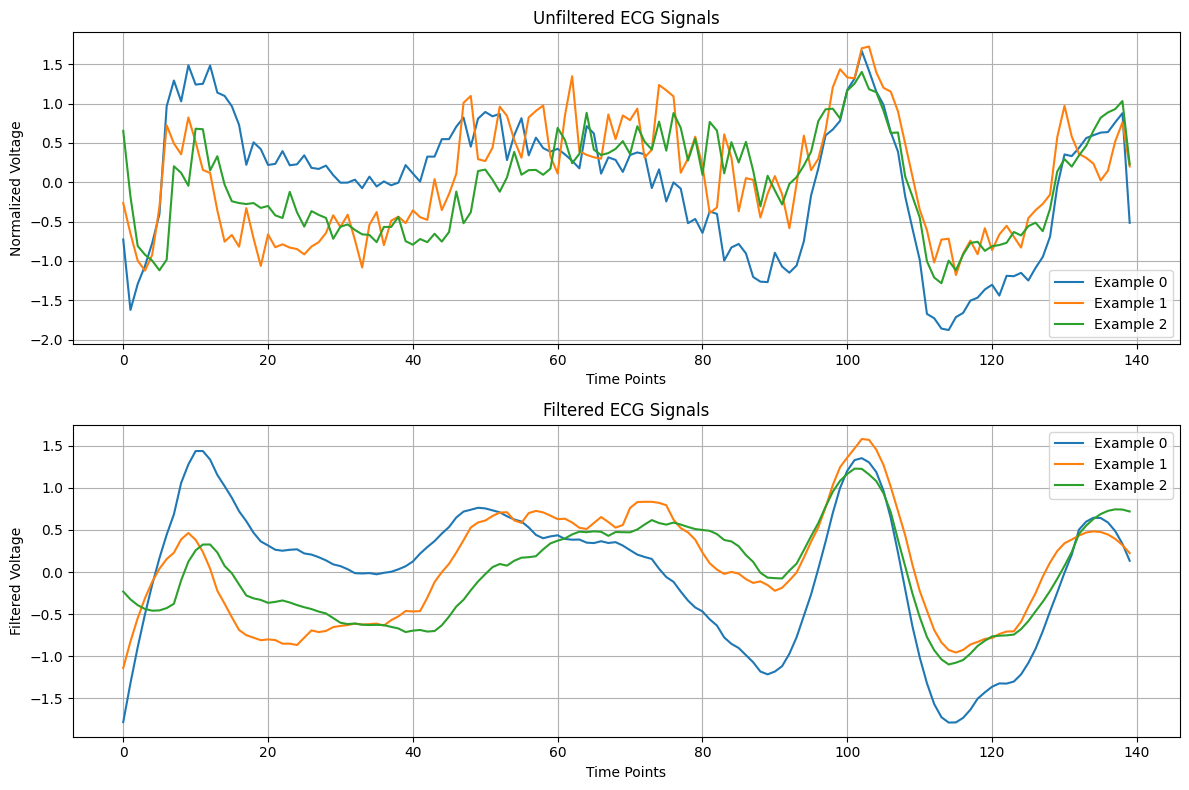

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ecg.csv')

# Step 1: Split the dataset into features (X) and labels (y)
X = df.iloc[:, :-1].values  # Features: voltage levels over time
y = df.iloc[:, -1].values   # Labels: 0 for aberrant, 1 for normal

# Step 2: Normalize the dataset
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Step 3: Filter the dataset (using Savitzky-Golay filter for demonstration)
# Here, we'll use a Savitzky-Golay filter to smooth the signals
X_filtered = np.zeros_like(X_normalized)
for i in range(X_normalized.shape[0]):
    X_filtered[i, :] = savgol_filter(X_normalized[i, :], window_length=15, polyorder=2)

# Step 4: Plot unfiltered and filtered signals
example_indices = [0, 1, 2]  # Indices of examples to plot

plt.figure(figsize=(12, 8))

# Plot unfiltered signals
plt.subplot(2, 1, 1)
plt.title('Unfiltered ECG Signals')
for idx in example_indices:
    plt.plot(X_normalized[idx, :], label=f'Example {idx}')
plt.xlabel('Time Points')
plt.ylabel('Normalized Voltage')
plt.legend()
plt.grid(True)

# Plot filtered signals
plt.subplot(2, 1, 2)
plt.title('Filtered ECG Signals')
for idx in example_indices:
    plt.plot(X_filtered[idx, :], label=f'Example {idx}')
plt.xlabel('Time Points')
plt.ylabel('Filtered Voltage')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


MSE for Moving Average (window=15): 0.17486953706491576
MSE for Savitzky-Golay (window=15, polyorder=2): 0.06565881230564588


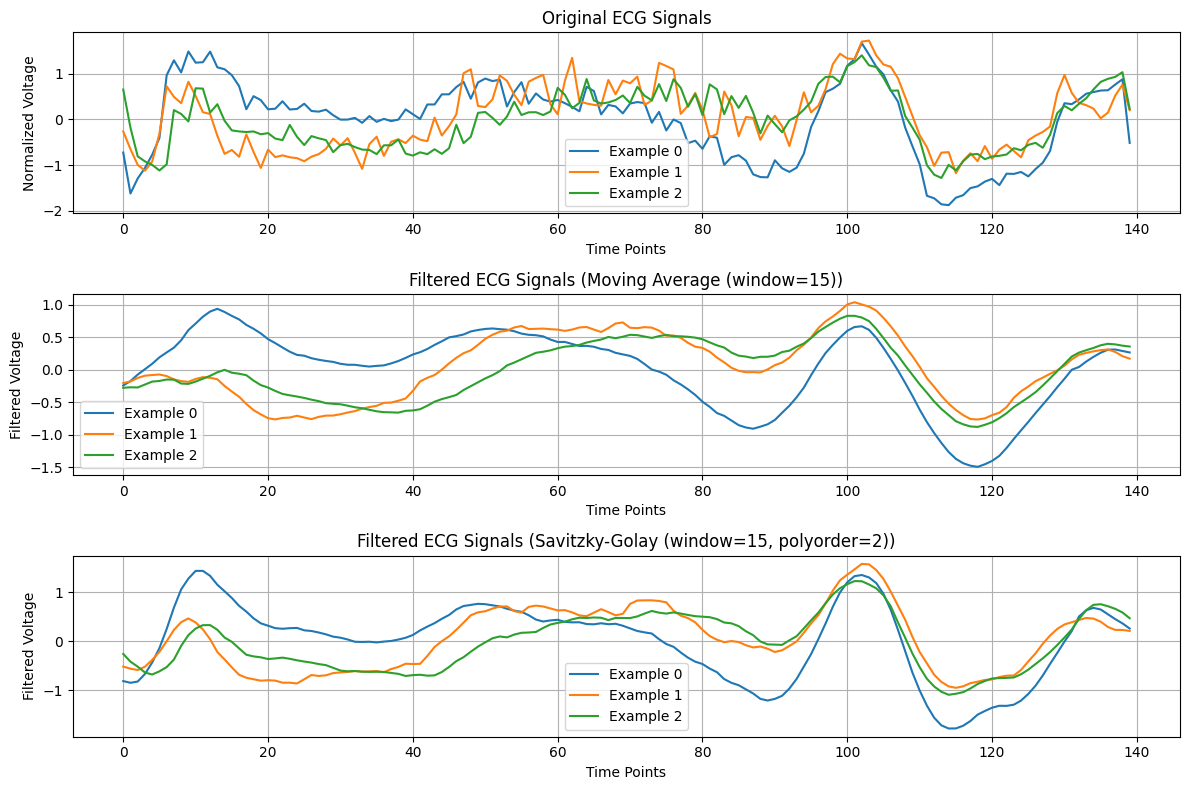

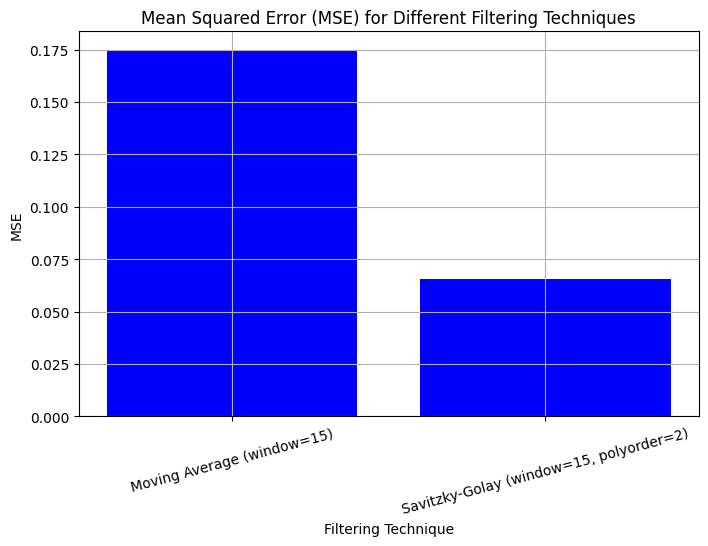

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ecg.csv')

# Step 1: Split the dataset into features (X) and labels (y)
X = df.iloc[:, :-1].values  # Features: voltage levels over time
y = df.iloc[:, -1].values   # Labels: 0 for aberrant, 1 for normal

# Step 2: Normalize the dataset
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Step 3: Pad the signals with zeros (extend by 100 points on each side)
padding_size = 100
X_padded = np.pad(X_normalized, ((0, 0), (padding_size, padding_size)), mode='constant', constant_values=0)

# Step 4: Define different filtering techniques (e.g., Savitzky-Golay filter, moving average, etc.)
def moving_average_filter(signal, window_size):
    # Apply the moving average filter to each row (signal) individually
    filtered_signal = np.zeros_like(signal)
    for i in range(signal.shape[0]):
        filtered_signal[i, :] = np.convolve(signal[i, :], np.ones(window_size)/window_size, mode='same')
    return filtered_signal

# Step 5: Calculate MSE for each filtering technique
original_signals = X_padded[:, padding_size:-padding_size]  # Remove padding for comparison

filtering_techniques = [
    {'name': 'Moving Average (window=15)', 'filtered_signals': moving_average_filter(X_padded, 15)},
    {'name': 'Savitzky-Golay (window=15, polyorder=2)', 'filtered_signals': savgol_filter(X_padded, 15, polyorder=2)}
]

mse_scores = []

for technique in filtering_techniques:
    filtered_signals = technique['filtered_signals'][:, padding_size:-padding_size]  # Remove padding
    mse = mean_squared_error(original_signals.flatten(), filtered_signals.flatten())
    mse_scores.append(mse)
    print(f"MSE for {technique['name']}: {mse}")

# Step 6: Plotting original and filtered signals for visualization
example_indices = [0, 1, 2]  # Indices of examples to plot

plt.figure(figsize=(12, 8))

# Plot original signals
plt.subplot(3, 1, 1)
plt.title('Original ECG Signals')
for idx in example_indices:
    plt.plot(original_signals[idx, :], label=f'Example {idx}')
plt.xlabel('Time Points')
plt.ylabel('Normalized Voltage')
plt.legend()
plt.grid(True)

# Plot filtered signals
for i, technique in enumerate(filtering_techniques):
    filtered_signals = technique['filtered_signals'][:, padding_size:-padding_size]
    plt.subplot(3, 1, i + 2)
    plt.title(f'Filtered ECG Signals ({technique["name"]})')
    for idx in example_indices:
        plt.plot(filtered_signals[idx, :], label=f'Example {idx}')
    plt.xlabel('Time Points')
    plt.ylabel('Filtered Voltage')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Plot MSE scores for comparison
plt.figure(figsize=(8, 5))
plt.bar([technique['name'] for technique in filtering_techniques], mse_scores, color='blue')
plt.title('Mean Squared Error (MSE) for Different Filtering Techniques')
plt.xlabel('Filtering Technique')
plt.ylabel('MSE')
plt.xticks(rotation=15)
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ecg.csv')

# Step 1: Split the dataset into features (X) and labels (y)
X = df.iloc[:, :-1].values  # Features: voltage levels over time
y = df.iloc[:, -1].values   # Labels: 0 for aberrant, 1 for normal

# Step 2: Normalize the dataset
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Step 3: Pad the signals with zeros (extend by 100 points on each side)
padding_size = 100
X_padded = np.pad(X_normalized, ((0, 0), (padding_size, padding_size)), mode='constant', constant_values=0)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_padded,y, test_size=0.4, random_state=35)

# Function to extract features
def extract_features(signal, sampling_rate=1000):
    # Find R peaks
    r_peaks, _ = find_peaks(signal, distance=sampling_rate*0.6)

    # Find T peaks (hypothetical example, adjust as per actual ECG characteristics)
    t_peaks, _ = find_peaks(-signal, distance=sampling_rate*0.6)

    # Calculate R amplitude
    r_amplitudes = signal[r_peaks]

    # Calculate T amplitude
    t_amplitudes = signal[t_peaks]

    # Calculate RR intervals
    rr_intervals = np.diff(r_peaks) / sampling_rate

    # Calculate QRS duration (hypothetical example)
    qrs_duration = 0.08  # Example QRS duration

    # Aggregate features
    features = {
        'R Amplitude': {
            'Mean': np.mean(r_amplitudes),
            'Median': np.median(r_amplitudes),
            'Sum': np.sum(r_amplitudes),
            # Add more metrics as needed
        },
        'T Amplitude': {
            'Mean': np.mean(t_amplitudes),
            'Median': np.median(t_amplitudes),
            'Sum': np.sum(t_amplitudes),
            # Add more metrics as needed
        },
        'RR Interval': {
            'Mean': np.mean(rr_intervals),
            'Median': np.median(rr_intervals),
            'Sum': np.sum(rr_intervals),
            # Add more metrics as needed
        },
        'QRS Duration': qrs_duration  # Single value for QRS duration
    }

    return features

# Step 4: Extract features for each sample in the training set
train_features = []

for i in range(X_padded.shape[0]):
    signal = X_padded[i, padding_size:-padding_size]
    sample_features = extract_features(signal)
    train_features.append(sample_features)

# Step 5: Convert features to DataFrame for easier manipulation (optional)
train_features_df = pd.DataFrame(train_features)

# Step 6: Print or further analyze features
print(train_features_df.head())  # Display the first few rows of the features DataFrame


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


                                         R Amplitude  \
0  {'Mean': 1.668894565413576, 'Median': 1.668894...   
1  {'Mean': 1.725957252503657, 'Median': 1.725957...   
2  {'Mean': 1.4028428444648846, 'Median': 1.40284...   
3  {'Mean': 1.1064713009108804, 'Median': 1.10647...   
4  {'Mean': 1.4313629275239383, 'Median': 1.43136...   

                                         T Amplitude  \
0  {'Mean': -1.8793163476009433, 'Median': -1.879...   
1  {'Mean': -1.1797810111344815, 'Median': -1.179...   
2  {'Mean': -1.2836398073055728, 'Median': -1.283...   
3  {'Mean': -1.5274898453368864, 'Median': -1.527...   
4  {'Mean': -1.4322945963067784, 'Median': -1.432...   

                                RR Interval  QRS Duration  
0  {'Mean': nan, 'Median': nan, 'Sum': 0.0}          0.08  
1  {'Mean': nan, 'Median': nan, 'Sum': 0.0}          0.08  
2  {'Mean': nan, 'Median': nan, 'Sum': 0.0}          0.08  
3  {'Mean': nan, 'Median': nan, 'Sum': 0.0}          0.08  
4  {'Mean': nan, 'Median':

In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.graph_objects as go

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ecg.csv')

# Step 1: Split the dataset into features (X) and labels (y)
X = df.iloc[:, :-1].values  # Features: voltage levels over time
y = df.iloc[:, -1].values   # Labels: 0 for aberrant, 1 for normal

# Step 2: Normalize the dataset
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Step 3: Pad the signals with zeros (extend by 100 points on each side)
padding_size = 100
X_padded = np.pad(X_normalized, ((0, 0), (padding_size, padding_size)), mode='constant', constant_values=0)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_padded,y, test_size=0.4, random_state=35)

# Function to extract features
def extract_features(signal, sampling_rate=1000):
    # Find R peaks
    r_peaks, _ = find_peaks(signal, distance=sampling_rate*0.6)

    # Find T peaks (hypothetical example, adjust as per actual ECG characteristics)
    t_peaks, _ = find_peaks(-signal, distance=sampling_rate*0.6)

    # Calculate R amplitude
    r_amplitudes = signal[r_peaks]

    # Calculate T amplitude
    t_amplitudes = signal[t_peaks]

    # Calculate RR intervals
    rr_intervals = np.diff(r_peaks) / sampling_rate

    # Calculate QRS duration (hypothetical example)
    qrs_duration = 0.08  # Example QRS duration

    # Aggregate features into a list instead of a dictionary
    features = [
        np.mean(r_amplitudes),
        np.median(r_amplitudes),
        np.sum(r_amplitudes),
        np.mean(t_amplitudes),
        np.median(t_amplitudes),
        np.sum(t_amplitudes),
        np.mean(rr_intervals),
        np.median(rr_intervals),
        np.sum(rr_intervals),
        qrs_duration
    ]

    return features

# Step 4: Extract features for each sample in the test set
test_features = []

for i in range(X_padded.shape[0]):
    signal = X_padded[i, padding_size:-padding_size]
    sample_features = extract_features(signal)
    test_features.append(sample_features)

# Step 5: Convert features to NumPy array
test_features_np = np.array(test_features)

# Reshape the features data for LSTM input
X_features = test_features_np.reshape(test_features_np.shape[0], 1, test_features_np.shape[1])

# Define the model architecture
model = Sequential([
    LSTM(units=64, return_sequences=True, input_shape=(X_features.shape[1], X_features.shape[2])),
    LSTM(units=32, return_sequences=False),
    Dense(units=1, activation='sigmoid')  # Output layer for binary classification
])

model.summary()

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_features, y, epochs=50)

# Make predictions on the test set
y_pred = model.predict(X_features)

# Make predictions on the TEST set (X_test_features)
X_test_features = np.array([extract_features(signal) for signal in X_test[:, padding_size:-padding_size]])
X_test_features = X_test_features.reshape(X_test_features.shape[0], 1, X_test_features.shape[1])
y_pred = model.predict(X_test_features)

# Since y_pred will be probabilities, you can convert them to binary labels
# Assuming threshold of 0.5 (adjust as needed)
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy:.2f}')

# Evaluate precision
precision = precision_score(y_test, y_pred_binary)
print(f'Precision: {precision:.2f}')

# Evaluate recall
recall = recall_score(y_test, y_pred_binary)
print(f'Recall: {recall:.2f}')


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix using Plotly
labels = ['Aberrant (0)', 'Normal (1)']

fig = ff.create_annotated_heatmap(cm, x=labels, y=labels, colorscale='Blues')

fig.update_layout(
    title='Confusion Matrix',
    xaxis_title='Predicted label',
    yaxis_title='True label'
)

fig.show()

# Train the model with validation split
history = model.fit(X_features, y, epochs=50, validation_split=0.2)  # Add validation_split


# Extract training and validation loss from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a figure for loss visualization
fig = go.Figure()

# Add training loss trace
fig.add_trace(go.Scatter(x=np.arange(1, len(train_loss) + 1), y=train_loss, mode='lines', name='Train Loss'))

# Add validation loss trace
fig.add_trace(go.Scatter(x=np.arange(1, len(val_loss) + 1), y=val_loss, mode='lines', name='Validation Loss'))

# Update layout
fig.update_layout(
    title='Training and Validation Loss',
    xaxis_title='Epoch',
    yaxis_title='Loss',
    legend=dict(x=0.7, y=1.0),
    margin=dict(l=20, r=20, t=40, b=20)
)

# Show plot
fig.show()



/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 1, 64)             19200     
                                                                 
 lstm_33 (LSTM)              (None, 32)                12416     
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 31649 (123.63 KB)
Trainable params: 31649 (123.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
157/157 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.4160
Epoch 2/50
157/157 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4160
Epoch 3/50
157/157 [==============================] - 0s 3ms/step - loss: nan - accur

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Epoch 1/50
125/125 [==============================] - 1s 9ms/step - loss: nan - accuracy: 0.2700 - val_loss: nan - val_accuracy: 1.0000
Epoch 2/50
125/125 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.2700 - val_loss: nan - val_accuracy: 1.0000
Epoch 3/50
125/125 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.2700 - val_loss: nan - val_accuracy: 1.0000
Epoch 4/50
125/125 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.2700 - val_loss: nan - val_accuracy: 1.0000
Epoch 5/50
125/125 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.2700 - val_loss: nan - val_accuracy: 1.0000
Epoch 6/50
125/125 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.2700 - val_loss: nan - val_accuracy: 1.0000
Epoch 7/50
125/125 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.2700 - val_loss: nan - val_accuracy: 1.0000
Epoch 8/50
125/125 [============================